# MC1
## Aufgabe 1
Erstelle in einem Jupyter-Notebook ein Programm, welches eine «Lineare Regression» mittels des Gradientenverfahrens umsetzt. Es soll dabei der einfache Fall mit einer Inputvariablen (x) und einer Outputvariablen (y) umgesetzt werden und mit dem zur Verfügung gestellten Datensatz («data_a1_mc1_vta_hs25.csv») trainiert werden. Verwende als Fehlerfunktion den mittleren quadratischen Fehler und passe die Parameter (w_0, w_1) der linearen Regression (y=w_1*x+w_0) gemäss dem Gradienten mit einer Vernünftigen Lernrate (mue) während ca. 50 Epochen an.

Vergleiche die gefundenen Werte der Regression mit der analytischen Berechnung (siehe ala).

### Bib import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Clean data

In [2]:
df = pd.read_csv("Data/data_a1_mc1_vta_hs25.csv", sep=";")
df.dropna(inplace=True)
df.head()

,x,y
0,0,-2.000
1,1,-1.595
2,2,-1.302
3,3,-1.103
4,4,-1.520


### 1. Plot

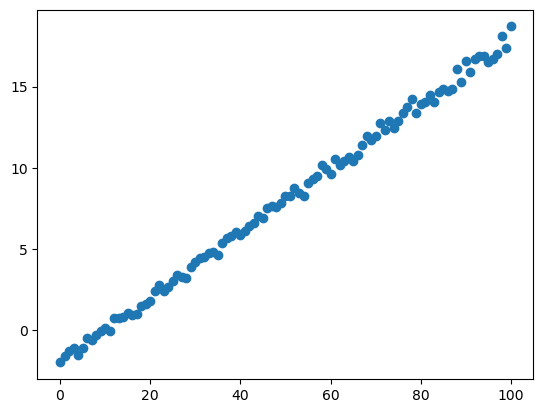

In [3]:
plt.scatter(y=df["y"], x=df["x"])
plt.show()

### Daten Reshape

In [4]:
x = df["x"].values.reshape(-1,1)
y = df["y"].values.reshape(-1,1)

### parameter initialisieren

In [11]:
w1, w0 = 0.0, 0.0
mue = 0.00015
epochs = 50

n = len(x)

### Gradient Descent Schleife

In [14]:
for epoch in range(epochs):
    y_pred = w1 * x + w0
    error = y - y_pred

    # Gradienten
    dw0 = -2/n * sum(error)
    dw1 = -2/n * sum(x * error)

    w0 -= mue * dw0
    w1 -= mue * dw1

    mse = (error**2).mean()
    print(f"Epoche {epoch+1}: MSE = {mse:.4f}")

Epoche 1: MSE = 1.0348
Epoche 2: MSE = 1.0346
Epoche 3: MSE = 1.0345
Epoche 4: MSE = 1.0343
Epoche 5: MSE = 1.0342
Epoche 6: MSE = 1.0340
Epoche 7: MSE = 1.0339
Epoche 8: MSE = 1.0337
Epoche 9: MSE = 1.0336
Epoche 10: MSE = 1.0335
Epoche 11: MSE = 1.0333
Epoche 12: MSE = 1.0332
Epoche 13: MSE = 1.0330
Epoche 14: MSE = 1.0329
Epoche 15: MSE = 1.0327
Epoche 16: MSE = 1.0326
Epoche 17: MSE = 1.0324
Epoche 18: MSE = 1.0323
Epoche 19: MSE = 1.0322
Epoche 20: MSE = 1.0320
Epoche 21: MSE = 1.0319
Epoche 22: MSE = 1.0317
Epoche 23: MSE = 1.0316
Epoche 24: MSE = 1.0314
Epoche 25: MSE = 1.0313
Epoche 26: MSE = 1.0312
Epoche 27: MSE = 1.0310
Epoche 28: MSE = 1.0309
Epoche 29: MSE = 1.0307
Epoche 30: MSE = 1.0306
Epoche 31: MSE = 1.0304
Epoche 32: MSE = 1.0303
Epoche 33: MSE = 1.0301
Epoche 34: MSE = 1.0300
Epoche 35: MSE = 1.0299
Epoche 36: MSE = 1.0297
Epoche 37: MSE = 1.0296
Epoche 38: MSE = 1.0294
Epoche 39: MSE = 1.0293
Epoche 40: MSE = 1.0291
Epoche 41: MSE = 1.0290
Epoche 42: MSE = 1.0289
E

### Lineare Regression

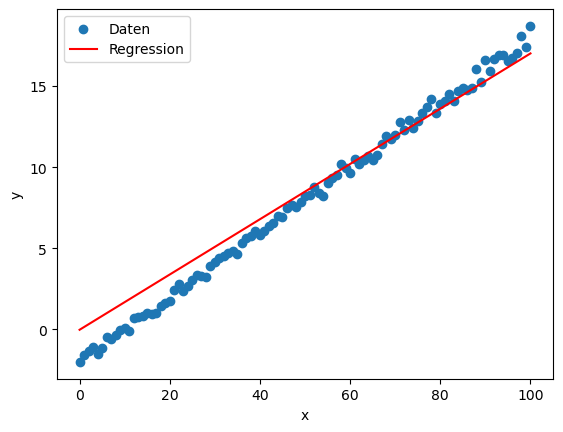

In [15]:
plt.scatter(x, y, label="Daten")
plt.plot(x, w1*x + w0, color='red', label="Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### Gradientenfeld

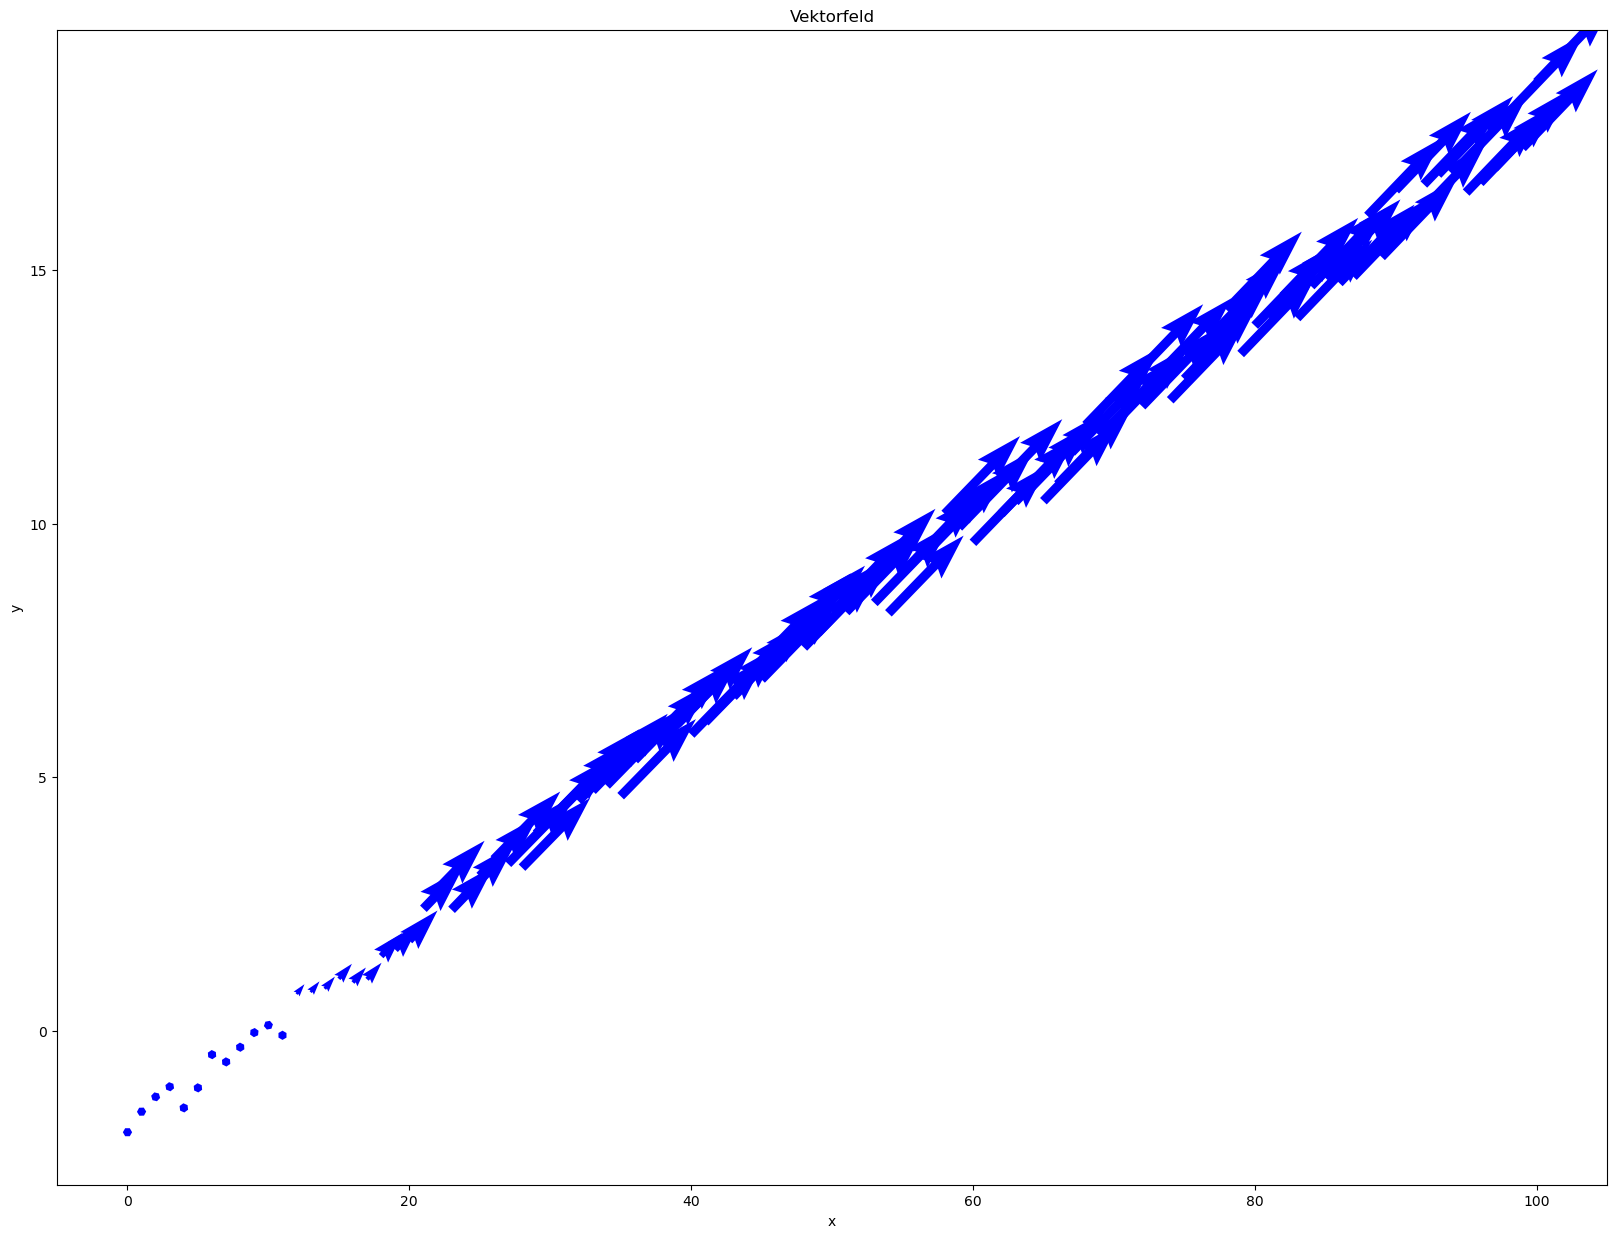

In [8]:
xy_clip = np.clip(x * y, -2, 100)
U = (1 + xy_clip) * np.exp(xy_clip)
V = x**2 * np.exp(xy_clip)

U_scaled = np.sign(U) * np.log1p(np.abs(U))
V_scaled = np.sign(V) * np.log1p(np.abs(V))

fig, ax = plt.subplots(figsize=(20,15))
Q = ax.quiver(x, y, U_scaled, V_scaled, units='width', color='blue')
ax.set_title('Vektorfeld')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.quiverkey(Q, X=0.9, Y=1.05, U=1, label=r'$1\,\mathrm{Einheit}$', labelpos='E')

plt.show()

### Analytische Berechnung mit der Normalengleichung

In [16]:
X = np.hstack((np.ones_like(x), x))
w_analytisch = np.linalg.inv(X.T @ X) @ X.T @ y

w0_analytisch = w_analytisch[0, 0]
w1_analytisch = w_analytisch[1, 0]

print(f"Analytische Lösung: b(w0) = {w0_analytisch:.4f}, m(w1) = {w1_analytisch:.4f}")
print(f"Gradient Descent:   b(w0) = {w0.item():.4f}, m(w1) = {w1.item():.4f}")


Analytische Lösung: b(w0) = -1.9454, m(w1) = 0.1990
Gradient Descent:   b(w0) = -0.0196, m(w1) = 0.1703


### Plot Gradient Descent vs. Normalengleichung

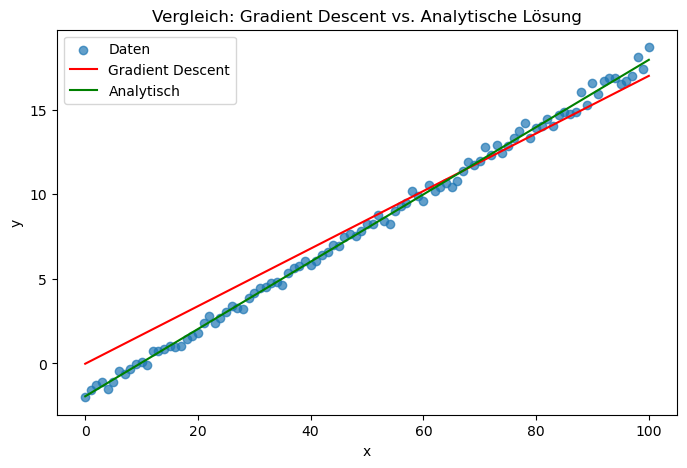

In [20]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Daten", alpha=0.7)
plt.plot(x, w1*x + w0, color='red', label="Gradient Descent")  # Linie vom Gradientenverfahren
plt.plot(x, w1_analytisch*x + w0_analytisch, color='green', label="Analytisch")  # analytische Linie
plt.xlabel("x")
plt.ylabel("y")
plt.title("Vergleich: Gradient Descent vs. Analytische Lösung")
plt.legend()
plt.show()